In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sea 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [8]:
df['cleanedresume']=''

In [9]:
df.shape

(962, 3)

In [10]:
df.head()

,Category,Resume,cleanedresume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [12]:
print('The distict category of resume:')
print(df['Category'].value_counts())

The distict category of resume:
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Operations Manager           40
Blockchain                   40
ETL Developer                40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


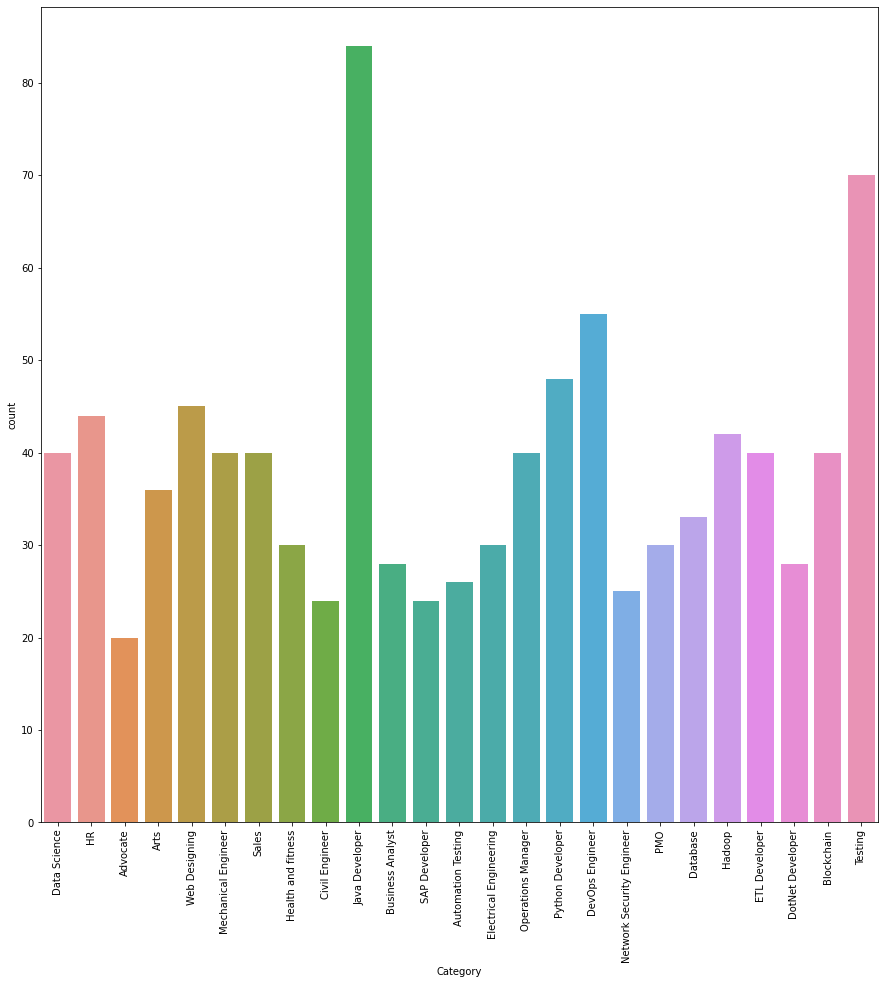

In [14]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sea.countplot(df['Category'])
plt.show()

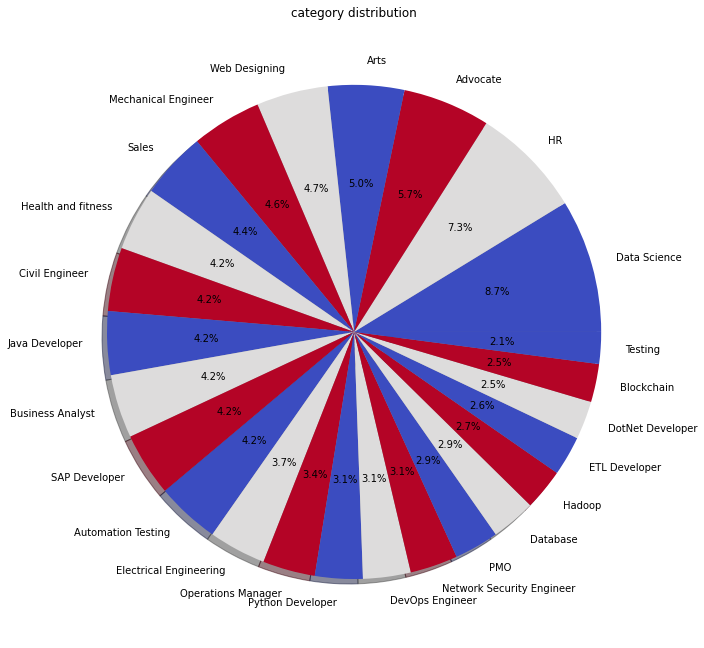

In [17]:
from matplotlib.gridspec import GridSpec
targetcounts=df['Category'].value_counts()
targetlabels=df['Category'].unique()
plt.figure(1,figsize=(25,25))
the_grid=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')
color=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_grid[0,1],aspect=1,title='category distribution')

source_pie = plt.pie(targetcounts, labels=targetlabels, autopct='%1.1f%%', shadow=True, colors=color)
plt.show()

In [20]:
import re 
def cleanresume(resumetext):
    resumetext = re.sub('http\S+\s*', ' ', resumetext)  
    resumetext = re.sub('RT|cc', ' ', resumetext)  
    resumetext = re.sub('#\S+', '', resumetext)  
    resumetext = re.sub('@\S+', '  ', resumetext)  
    resumetext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumetext)  
    resumetext = re.sub(r'[^\x00-\x7f]',r' ', resumetext) 
    resumetext = re.sub('\s+', ' ', resumetext)
    return resumetext

In [56]:
df['cleanedresume']=df['Resume'].apply(lambda x:cleanresume(x))

In [69]:
df.head()

,Category,Resume,cleanedresume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 May 2017 B E UIT RG...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas Interest Deep Learning Control System De...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [58]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [59]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])

In [64]:
def remove(text):
    var2=[]
    var1=text.split(' ')
    for word in var1:
        if word  not in oneSetOfStopWords:
            var2.append(word)
    return var2

In [65]:
df['cleanedresume']=df['cleanedresume'].apply(lambda x:remove(x))

In [68]:
df['cleanedresume']=df['cleanedresume'].apply(lambda x:' '.join(x))

In [ ]:
corpus=' '.join(df['cleanedresume'])

In [71]:
print(corpus)

Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists elerating review process run analy

In [72]:
corpus=corpus.split(' ')

In [73]:
len(corpus)

326733

In [75]:
wordfreq=nltk.FreqDist(corpus)
mostcommon=wordfreq.most_common(50)
print(mostcommon)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('', 663), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634)]


In [ ]:
wc=WordCloud().generate()

In [76]:
cleanedSentences

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [80]:
from sklearn.preprocessing import LabelEncoder

var_mode=['category']
le=LabelEncoder()

for i in var_mode:
    df['Category']=le.fit_transform(df['Category'])

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
x=df['Category']
y=df['cleanedresume']

In [85]:
word_vectorizer=TfidfVectorizer(
sublinear_tf=True,
stop_words='english',
max_features=1500)

In [87]:
x_final=word_vectorizer.fit_transform(y)

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x_final,x,random_state=0,test_size=0.20)

In [91]:
model=OneVsRestClassifier(KNeighborsClassifier())

In [93]:
model.fit(x_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [94]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score()